# MNIST 3: Analyse der Ergebnisse

Die Erkennung von handschriftlichen Ziffern kann durchaus als nicht-trivial bezeichnet werden. Bereits die Analyse des Problems erweist sich als äußerst schwierig: Wie beschreibt man den Unterschied zwischen zwei Ziffern, die auch noch auf so viele verschiedene Weisen geschrieben werden. Es muss dabei _Invarianten_ geben, die unabhängig vom Schreiber für jede Ziffer gleich sind. Darüber hinaus ist auch für den Menschen selbst manchmal nicht zu erkennen, um welche Ziffer es sich handeln soll. Das Problem ist in diesem Sinne also noch nicht einmal "scharf formuliert". Wie will man da einen Algorithmus implementieren?

Demgegenüber haben wir mit einem generischen neuronalen Netz, mit dem wir zuvor ein (scheibar) völlig anderes Problem gelöst haben, nämlich die Unterscheidung von Iris-Blüten anhand einiger Abmessungen, in wenigen Minuten gelöst. Die Trefferrate liegt dabei bei etwa 95 %, ein wirklich erstaunlich gutes, verblüffendes Ergebnis.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

import graphics as g
from mnist import MnistDataset
from mlp import MLP 

%matplotlib inline

Wir wollen uns nun das erzeugte neuronale Netz etwas genauer ansehen. Wir bauen das neuronale Netz aus den gespeicherten Gewichten:

In [2]:
mlp = MLP(28*28,100,10)
mlp.load("MNist")
# Unsere Skalierung

scale = MnistDataset.get_scaler()

Gewichte wurden geladen


Wir lesen noch einmal die Daten ein:

In [3]:
mnist_test  = MnistDataset('mnist_test.csv')

## Die Performance des Netzwerks

Sehen wir uns noch einmal an, wie gut das Netz arbeitet:

In [4]:
performance, fails = mlp.performance(mnist_test)
print(f'{100 * performance} %')

95.16 %


### Wie sehen falsch interpretierten Zeichen aus?

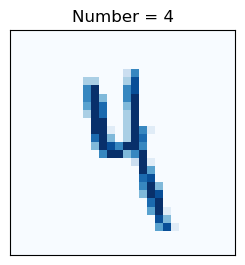

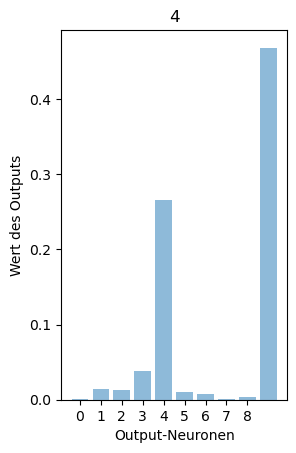

In [9]:
row = fails[np.random.randint(0,len(fails))]

data = mnist_test[row][1:]
value =  mnist_test[row][0]

output = mlp.forward((np.asfarray(data) / 255.0 * 0.99) + 0.01)
plt.subplot(1,2,1)
mnist_test.plot(row)
plt.subplot(1,2,2)
g.show_output(output,value)

### Wie werden völlig falsche Zeichen interpretiert?

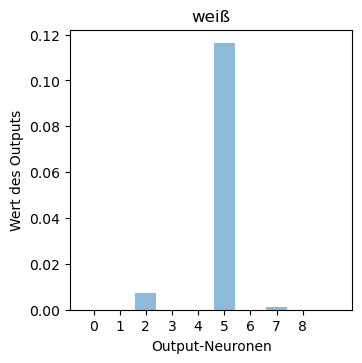

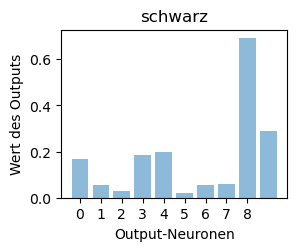

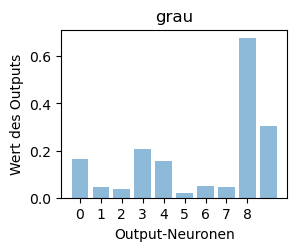

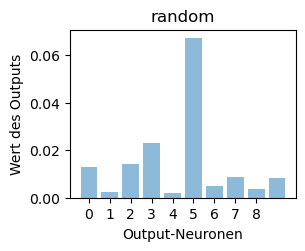

In [7]:
plt.figure(figsize=(8, 8))

plt.subplot(2,2,1)
g.show_output(mlp.forward(np.zeros(28*28) + 0.01),"weiß")
plt.subplot(2,2,2)
g.show_output(mlp.forward(np.zeros(28*28) + 0.99),"schwarz")
plt.subplot(2,2,3)
g.show_output(mlp.forward(np.zeros(28*28) + 0.5),"grau")
plt.subplot(2,2,4)
g.show_output(mlp.forward(np.random.rand(1,28*28)/10),"random")
plt.show()